# Load Packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from pprint import pprint
import warnings
warnings.filterwarnings("ignore")

# Read Data

In [3]:
edge1 = pd.read_csv("Edgelist2019_2.csv")
edge2 = pd.read_csv("Edgelist2020_1.csv")
edge3 = pd.read_csv("Edgelist2020_2.csv")
int_df = pd.read_csv("JoinedEdgelist.csv")
#icd10 = pd.read_csv("Prevalence_analysis.csv")

In [4]:
edge4 = int_df[['Source','Target','Weight_x']].copy()
edge5 = int_df[['Source','Target','Weight_y']].copy()
edge6 = int_df[['Source','Target','Weight']].copy()

In [ ]:
print(len(icd10))
icd10.head()

6898


,Id,alphabet,Description,Category,Prevalence_20192,Prevalence_20201,Prevalence_20202,Pre_Early_Prct,Early_Outbreak_Prct,Pre_Outbreak_Prct,Pre_rank,Early_rank,Outbreak_rank,Rank_change1,Rank_change2,Rank_change3
0,a020,a,Salmonella enteritis,Certain infectious and parasitic diseases,85,41,60,-0.517647,0.463415,-0.294118,2936,4051,3417,1115,-634,481
1,a029,a,"Salmonella infection, unspecified",Certain infectious and parasitic diseases,26,14,24,-0.461538,0.714286,-0.076923,5182,6308,5186,1126,-1122,4
2,a039,a,"Shigellosis, unspecified",Certain infectious and parasitic diseases,34,13,20,-0.617647,0.538462,-0.411765,4584,6427,5546,1843,-881,962
3,a040,a,Enteropathogenic Escherichia coli infection,Certain infectious and parasitic diseases,52,40,31,-0.230769,-0.225000,-0.403846,3779,4096,4668,317,572,889
4,a044,a,Other intestinal Escherichia coli infections,Certain infectious and parasitic diseases,79,47,29,-0.405063,-0.382979,-0.632911,3065,3789,4778,724,989,1713


In [ ]:
icd10[["alphabet","Category"]].value_counts()

alphabet  Category                                                    
s         Injury or poisoning                                             849
z         Other health services                                           617
i         Diseases of the circulatory system                              580
m         Diseases of the musculoskeletal system and connective tissue    576
t         Injury or poisoning                                             444
r         abnormal clinical findings                                      416
k         Diseases of the digestive system                                398
o         Pregnancy, childbirth and the puerperium                        381
f         Mental and behavioural disorders                                305
l         Diseases of the skin and subcutaneous tissue                    278
g         Diseases of the nervous system                                  265
c         Neoplasms                                                    

# Basic Graph Info

### Define the functions

In [5]:
def convert_graph(edgelist,name):
  graph=nx.Graph()
  graph.add_weighted_edges_from([tuple(x) for x in edgelist.values])
  graph.name = "Covid DisNet for" + " " + name
  print(nx.info(graph))
  print("------------------------------------")
  print("************************************")
  print("------------------------------------")
  return graph

In [6]:
def basic_info(graph,name):
  number_of_triangles = sum(nx.triangles(graph).values()) / 3
  transitivity = nx.algorithms.cluster.transitivity(graph)
  avg_clustering_coef = nx.average_clustering(graph)
  print(" ") 
  print(" ")  
  print("Information for the graph of",name)
  table = pd.DataFrame({"number of triangles":[number_of_triangles],
                        "transitivity":[transitivity],
                        "average clustering coefficient":[avg_clustering_coef]})
  return print(table.to_string(index=False))


In [3]:
def sub_graph(graph,nodeslist):
  H = nx.subgraph(graph,nodeslist)
  return nx.draw(H, with_labels=True, font_weight='bold', node_color='lightblue', node_size=60)

### Analysis

In [10]:
%%time
graph1 = convert_graph(edge1,"2019-2")
graph2 = convert_graph(edge2,"2020-1")
graph3 = convert_graph(edge3,"2020-2")
graph4 = convert_graph(edge4,"Intersec_191")

Name: Covid DisNet for 2019-2
Type: Graph
Number of nodes: 2075
Number of edges: 28925
Average degree:  27.8795
------------------------------------
************************************
------------------------------------
Name: Covid DisNet for 2020-1
Type: Graph
Number of nodes: 2049
Number of edges: 28980
Average degree:  28.2870
------------------------------------
************************************
------------------------------------
Name: Covid DisNet for 2020-2
Type: Graph
Number of nodes: 2101
Number of edges: 30105
Average degree:  28.6578
------------------------------------
************************************
------------------------------------
Name: Covid DisNet for Intersec_191
Type: Graph
Number of nodes: 1337
Number of edges: 12754
Average degree:  19.0785
------------------------------------
************************************
------------------------------------
CPU times: user 325 ms, sys: 24.1 ms, total: 350 ms
Wall time: 364 ms


In [9]:
%%time
basic_info(graph1,"2019-2")
basic_info(graph2,"2020-1")
basic_info(graph3,"2020-2")
basic_info(graph4,"2019-2")
basic_info(graph5,"2020-1")
basic_info(graph6,"2020-2")

 
 
Information for the graph of 2019-2
 number of triangles  transitivity  average clustering coefficient
            791705.0      0.493457                        0.467797
 
 
Information for the graph of 2020-1
 number of triangles  transitivity  average clustering coefficient
            804995.0      0.494684                        0.468307
 
 
Information for the graph of 2020-2
 number of triangles  transitivity  average clustering coefficient
            842044.0      0.490647                        0.478485
 
 
Information for the graph of 2019-2
 number of triangles  transitivity  average clustering coefficient
             70378.0       0.16557                        0.257051
 
 
Information for the graph of 2020-1
 number of triangles  transitivity  average clustering coefficient
             70378.0       0.16557                        0.257051
 
 
Information for the graph of 2020-2
 number of triangles  transitivity  average clustering coefficient
             70378.0   

In [ ]:
basicinfo = pd.DataFrame({"Graph":["Graph1","Graph2","Graph3"],
                          "Average Degree":[27.8795,28.2870,28.6578],
                          "Number of Triangles": [791705,804995,842044],
                          "Transitivity":[0.493457,0.494684,0.490647],
                          "Average Clustering Coefficient":[0.467797,0.468307,0.478485]})
display(basicinfo)

,Graph,Average Degree,Number of Triangles,Transitivity,Average Clustering Coefficient
0,Graph1,27.8795,791705,0.493457,0.467797
1,Graph2,28.2870,804995,0.494684,0.468307
2,Graph3,28.6578,842044,0.490647,0.478485


CPU times: user 59.2 ms, sys: 0 ns, total: 59.2 ms
Wall time: 62.7 ms


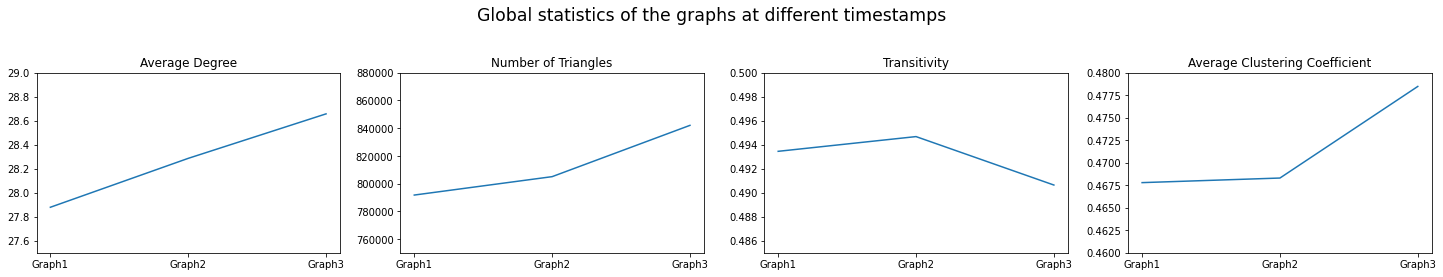

In [ ]:
%%time
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(25,4))
fig.suptitle('Global statistics of the graphs at different timestamps',fontsize="xx-large")
fig.subplots_adjust(top=0.75)

axs[0].plot(basicinfo.Graph, basicinfo["Average Degree"])
axs[0].set_title("Average Degree",loc='center')
axs[0].set_ylim([27.5,29])
axs[1].plot(basicinfo.Graph, basicinfo["Number of Triangles"])
axs[1].set_title("Number of Triangles",loc='center')
axs[1].set_ylim([750000,880000])
axs[2].plot(basicinfo.Graph, basicinfo["Transitivity"])
axs[2].set_title("Transitivity",loc='center')
axs[2].set_ylim([0.485,0.5])
axs[3].plot(basicinfo.Graph, basicinfo["Average Clustering Coefficient"])
axs[3].set_title("Average Clustering Coefficient",loc='center')
axs[3].set_ylim([0.46,0.48])

# Prevalence Trending Analysis

### outliers analysis

CPU times: user 132 ms, sys: 0 ns, total: 132 ms
Wall time: 150 ms


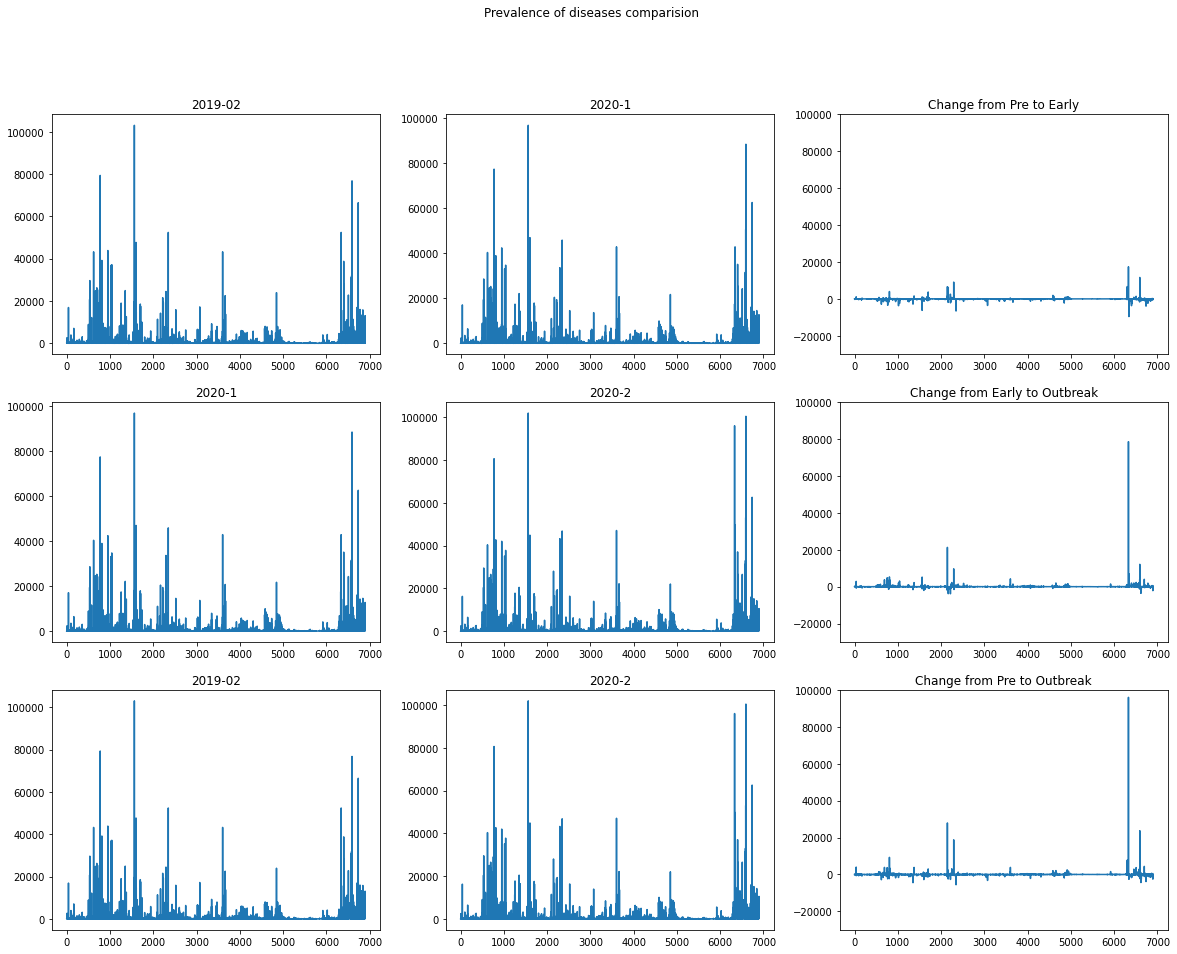

In [ ]:
%%time
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20,15))
fig.suptitle('Prevalence of diseases comparision')
axs[0,0].plot(icd10.Prevalence_20192)
axs[0,0].set_title("2019-02",loc='center')
axs[0,1].plot(icd10.Prevalence_20201)
axs[0,1].set_title("2020-1",loc='center')
axs[0,2].plot(icd10.index,icd10.Prevalence_20201-icd10.Prevalence_20192)
axs[0,2].set_ylim([-30000,100000])
axs[0,2].set_title("Change from Pre to Early",loc='center')

axs[1,0].plot(icd10.Prevalence_20201)
axs[1,0].set_title("2020-1",loc='center')
axs[1,1].plot(icd10.Prevalence_20202)
axs[1,1].set_title("2020-2",loc='center')
axs[1,2].plot(icd10.Prevalence_20202-icd10.Prevalence_20201)
axs[1,2].set_ylim([-30000,100000])
axs[1,2].set_title("Change from Early to Outbreak",loc='center')

axs[2,0].plot(icd10.Prevalence_20192)
axs[2,0].set_title("2019-02",loc='center')
axs[2,1].plot(icd10.Prevalence_20202)
axs[2,1].set_title("2020-2",loc='center')
axs[2,2].plot(icd10.Prevalence_20202-icd10.Prevalence_20192)
axs[2,2].set_ylim([-30000,100000])
axs[2,2].set_title("Change from Pre to Outbreak",loc='center')

CPU times: user 185 ms, sys: 0 ns, total: 185 ms
Wall time: 185 ms


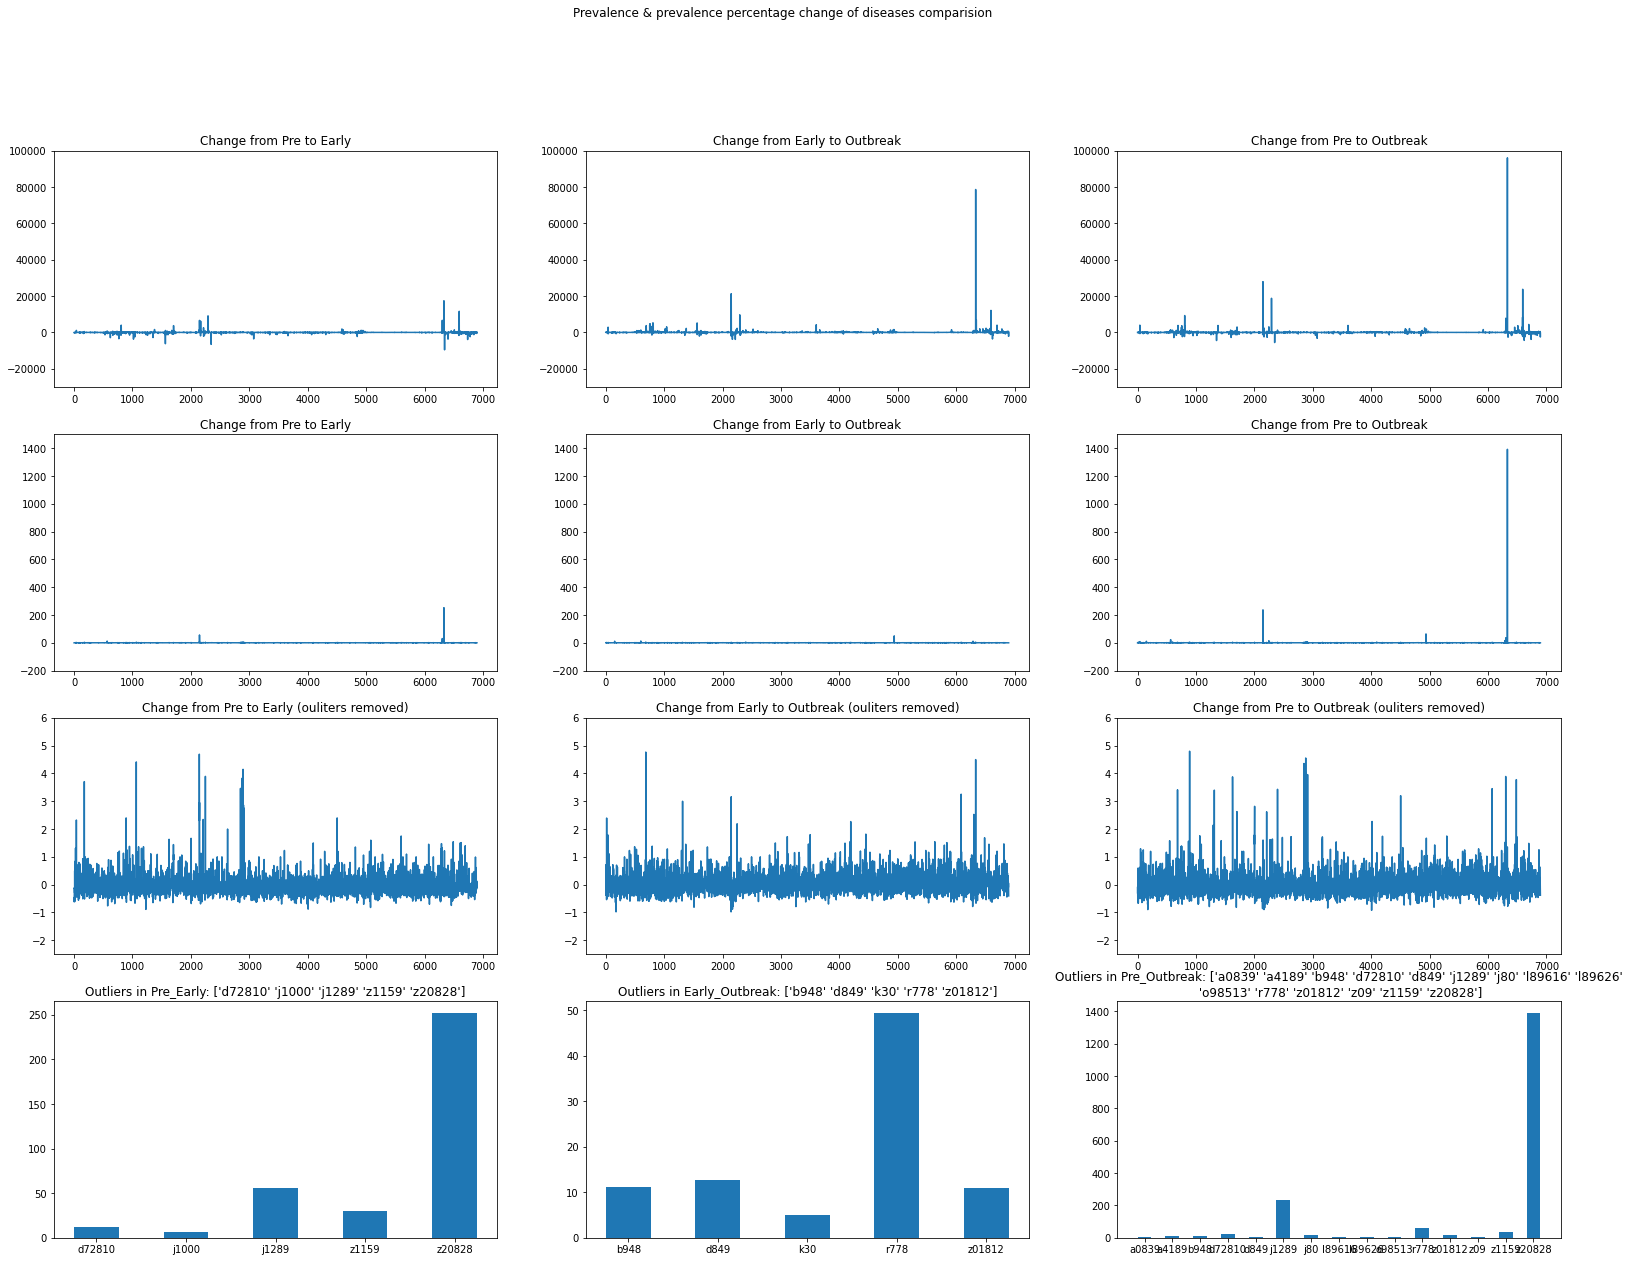

In [ ]:
%%time
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(27,20))
fig.suptitle('Prevalence & prevalence percentage change of diseases comparision')

axs[0,0].plot(icd10.index,icd10.Prevalence_20201-icd10.Prevalence_20192)
axs[0,0].set_ylim([-30000,100000])
axs[0,0].set_title("Change from Pre to Early",loc='center')
axs[0,1].plot(icd10.Prevalence_20202-icd10.Prevalence_20201)
axs[0,1].set_ylim([-30000,100000])
axs[0,1].set_title("Change from Early to Outbreak",loc='center')
axs[0,2].plot(icd10.Prevalence_20202-icd10.Prevalence_20192)
axs[0,2].set_ylim([-30000,100000])
axs[0,2].set_title("Change from Pre to Outbreak",loc='center')

axs[1,0].plot(icd10.Pre_Early_Prct)
axs[1,0].set_ylim([-200,1500])
axs[1,0].set_title("Change from Pre to Early",loc='center')
axs[1,1].plot(icd10.Early_Outbreak_Prct)
axs[1,1].set_ylim([-200,1500])
axs[1,1].set_title("Change from Early to Outbreak",loc='center')
axs[1,2].plot(icd10.Pre_Outbreak_Prct)
axs[1,2].set_ylim([-200,1500])
axs[1,2].set_title("Change from Pre to Outbreak",loc='center')

axs[2,0].plot(icd10.Pre_Early_Prct[abs(icd10.Pre_Early_Prct)<=5])
axs[2,0].set_ylim([-2.5,6])
axs[2,0].set_title("Change from Pre to Early (ouliters removed)",loc='center')
axs[2,1].plot(icd10.Early_Outbreak_Prct[abs(icd10.Early_Outbreak_Prct)<=5])
axs[2,1].set_ylim([-2.5,6])
axs[2,1].set_title("Change from Early to Outbreak (ouliters removed)",loc='center')
axs[2,2].plot(icd10.Pre_Outbreak_Prct[abs(icd10.Pre_Outbreak_Prct)<=5])
axs[2,2].set_ylim([-2.5,6])
axs[2,2].set_title("Change from Pre to Outbreak (ouliters removed)",loc='center')

axs[3,0].bar(icd10.Id[abs(icd10.Pre_Early_Prct)>=5].values,icd10.Pre_Early_Prct[abs(icd10.Pre_Early_Prct)>=5].values,width=0.5,align='center')
axs[3,0].set_title(("Outliers in Pre_Early: {}".format(icd10.Id[abs(icd10.Pre_Early_Prct)>=5].values)),loc='center')
axs[3,1].bar(icd10.Id[abs(icd10.Early_Outbreak_Prct)>=5],icd10.Early_Outbreak_Prct[abs(icd10.Early_Outbreak_Prct)>=5],width=0.5,align='center')
axs[3,1].set_title(("Outliers in Early_Outbreak: {}".format(icd10.Id[abs(icd10.Early_Outbreak_Prct)>=5].values)),loc='center')
axs[3,2].bar(icd10.Id[abs(icd10.Pre_Outbreak_Prct)>=5],icd10.Pre_Outbreak_Prct[abs(icd10.Pre_Outbreak_Prct)>=5],width=0.5,align='center')
axs[3,2].set_title(("Outliers in Pre_Outbreak: {}".format(icd10.Id[abs(icd10.Pre_Outbreak_Prct)>=5].values)),loc='center')

In [ ]:
print("Length: {}".format(len(icd10.Id[abs(icd10.Pre_Early_Prct)>=5].values)),icd10.Id[abs(icd10.Pre_Early_Prct)>=5].values)
print("Length: {}".format(len(icd10.Id[abs(icd10.Early_Outbreak_Prct)>=5].values)),icd10.Id[abs(icd10.Early_Outbreak_Prct)>=5].values)
print("Length: {}".format(len(icd10.Id[abs(icd10.Pre_Outbreak_Prct)>=5].values)),icd10.Id[abs(icd10.Pre_Outbreak_Prct)>=5].values)

Length: 5 ['d72810' 'j1000' 'j1289' 'z1159' 'z20828']
Length: 5 ['b948' 'd849' 'k30' 'r778' 'z01812']
Length: 15 ['a0839' 'a4189' 'b948' 'd72810' 'd849' 'j1289' 'j80' 'l89616' 'l89626'
 'o98513' 'r778' 'z01812' 'z09' 'z1159' 'z20828']


In [ ]:
outliers = list(set(['d72810','j1000','j1289','z1159','z20828','b948', 'd849', 'k30', 'r778','z01812','a0839', 'a4189', 'b948', 'd72810', 'd849', 'j1289', 'j80', 'l89616', 'l89626',
 'o98513', 'r778', 'z01812', 'z09', 'z1159', 'z20828']))
col = ["alphabet","Category"]
icd10[col][icd10.Id.isin(outliers)].value_counts()

alphabet  Category                                    
z         Other health services                           4
j         Diseases of the respiratory system              3
l         Diseases of the skin and subcutaneous tissue    2
d         Blood and immune disorders                      2
a         Certain infectious and parasitic diseases       2
r         abnormal clinical findings                      1
o         Pregnancy, childbirth and the puerperium        1
k         Diseases of the digestive system                1
b         Certain infectious and parasitic diseases       1
dtype: int64

In [ ]:
col = ["Id","alphabet","Description","Category","Pre_Early_Prct"]
print("Pre_Early-Length: {}".format(len(icd10.Id[abs(icd10.Pre_Early_Prct)>=5].values)))
print(icd10[col][abs(icd10.Pre_Early_Prct)>=5].to_string())
col = ["Id","alphabet","Description","Category","Early_Outbreak_Prct"]
print("Early_Outbreak-Length: {}".format(len(icd10.Id[abs(icd10.Early_Outbreak_Prct)>=5].values)))
print(icd10[col][abs(icd10.Early_Outbreak_Prct)>=5].to_string())
col = ["Id","alphabet","Description","Category","Pre_Outbreak_Prct"]
print("Pre_Outbreak-Length: {}".format(len(icd10.Id[abs(icd10.Pre_Outbreak_Prct)>=5].values)))
print(icd10[col][abs(icd10.Pre_Outbreak_Prct)>=5].to_string())

Pre_Early-Length: 5
          Id alphabet                                                                           Description                            Category  Pre_Early_Prct
566   d72810        d                                                                       Lymphocytopenia         Blood and immune disorders        12.179104
2143   j1000        j  Influenza due to other identified influenza virus with unspecified type of pneumonia  Diseases of the respiratory system        6.051095
2147   j1289        j                                                                 Other viral pneumonia  Diseases of the respiratory system       56.084746
6304   z1159        z                                      Encounter for screening for other viral diseases               Other health services       30.429224
6332  z20828        z            Contact with and (suspected) exposure to other viral communicable diseases               Other health services      252.246377
Early_Outbreak-Lengt

In [ ]:
idlist = [icd10.Id[abs(icd10.Pre_Early_Prct)>=5],icd10.Id[abs(icd10.Early_Outbreak_Prct)>=5],icd10.Id[abs(icd10.Pre_Outbreak_Prct)>=5]]
bad = 0
for row in idlist[0].values:
  try:
    print(row,icd10.Category[icd10.Id==row].to_list(), ":", list(graph2.neighbors(row)))
  except:
    pass
print("--------------------------------------------------------------------------")
for row in idlist[1].values:
  try:
    print(row,icd10.Category[icd10.Id==row].to_list(), ":", list(graph3.neighbors(row)))
  except:
    pass
print("--------------------------------------------------------------------------")
for row in idlist[2].values:
  try:
    print(row,icd10.Category[icd10.Id==row].to_list(), ":", list(graph3.neighbors(row)))
  except:
    pass
print("--------------------------------------------------------------------------")

d72810 ['Blood and immune disorders '] : ['z20828', 'j1289', 'j9601', 'u071']
j1000 ['Diseases of the respiratory system'] : ['j441', 'a419', 'j9601', 'j440']
j1289 ['Diseases of the respiratory system'] : ['e039', 'e8342', 'e871', 'e872', 'e876', 'f17210', 'i10', 'j159', 'r000', 'z79899', 'z9049', 'd649', 'e119', 'e860', 'f0280', 'i2510', 'n179', 'r05', 'z955', 'j441', 'n189', 'z7901', 'd61818', 'e6601', 'e8339', 'g9341', 'j45909', 'j80', 'z6841', 'e785', 'z880', 'd631', 'g4733', 'n183', 'r739', 'a419', 'e870', 'j9601', 'r1310', 'r6520', 'z515', 'z794', 'z7982', 'z7951', 'z79890', 'e669', 'j9621', 'z6842', 'z9981', 'd696', 'k219', 'i480', 'r0902', 'd72810', 'z8673', 'i129', 'e875', 'e8770', 'i120', 'n186', 'z87891', 'z992', 'f419', 'g8929', 'e46', 'i959', 'r509', 'z66', 'd509', 'e1122', 'f0390', 'z6843', 'z7984', 'f329', 'n390', 'r197', 'j189', 'e11649', 'd72819', 'r6521', 'i4891', 'n400', 'z7902', 'e1165', 'i110', 'e7800', 'e8351', 'r740', 'j440', 'k5900', 'm1990', 'z951', 'd638', 'i

### under report analysis

In [ ]:
# list of numbers
list1 = icd10.Prevalence_20201-icd10.Prevalence_20192
list2 = icd10.Prevalence_20202-icd10.Prevalence_20201
list3 = icd10.Prevalence_20202-icd10.Prevalence_20192
  
pos_count, neg_count = 0, 0
  
# iterating each number in list
for num in list3:
      
    # checking condition
    if num >= 0:
        pos_count += 1
  
    else:
        neg_count += 1
          
print("Positive numbers in the list: ", pos_count)
print("Negative numbers in the list: ", neg_count)

Positive numbers in the list:  2878
Negative numbers in the list:  4020


# Others.....

In [ ]:
id = list(dict(graph1.degree(weight="Weight")).keys())
len(id)

2075

In [ ]:
icd10[icd10.Id.isin(id)]

,Id,alphabet,Description,Category,Prevalence_20192,Prevalence_20201,Prevalence_20202
7,a0472,a,"Enterocolitis due to Clostridium difficile, no...",Certain infectious and parasitic diseases,2669,2365,2499
14,a0839,a,Other viral enteritis,Certain infectious and parasitic diseases,55,101,343
15,a084,a,"Viral intestinal infection, unspecified",Certain infectious and parasitic diseases,597,435,359
25,a403,a,Sepsis due to Streptococcus pneumoniae,Certain infectious and parasitic diseases,51,118,63
28,a4101,a,Sepsis due to Methicillin susceptible Staphylo...,Certain infectious and parasitic diseases,688,606,661
...,...,...,...,...,...,...,...
6893,z9911,z,Dependence on respirator [ventilator] status,Other health services,1512,1712,1797
6894,z992,z,Dependence on renal dialysis,Other health services,9768,9692,10254
6895,z993,z,Dependence on wheelchair,Other health services,2605,2349,2252
6896,z9981,z,Dependence on supplemental oxygen,Other health services,13081,12713,10545


In [ ]:
degree_centrality = nx.algorithms.centrality.degree_centrality(graph)
first10pairs = {k: degree_centrality[k] for k in sorted(degree_centrality.keys())[:10]}
first10pairs

{'a0472': 0.029523809523809525,
 'a0839': 0.0009523809523809524,
 'a403': 0.0004761904761904762,
 'a4101': 0.0014285714285714286,
 'a4102': 0.0009523809523809524,
 'a414': 0.0004761904761904762,
 'a4151': 0.007142857142857143,
 'a4152': 0.0004761904761904762,
 'a4159': 0.002857142857142857,
 'a4189': 0.047142857142857146}

In [ ]:
eigenvector_centrality = nx.algorithms.centrality.eigenvector_centrality_numpy(graph)
first10pairs = {k: eigenvector_centrality[k] for k in sorted(eigenvector_centrality.keys())[:10]}
first10pairs

{'a0472': 0.028865883398139978,
 'a0839': 0.0009338308525216134,
 'a403': -1.910580976727113e-18,
 'a4101': 0.0003981326292866526,
 'a4102': 1.0572806113661003e-05,
 'a414': 0.00016837607865647814,
 'a4151': 0.005496076889414611,
 'a4152': 1.1188211825370778e-05,
 'a4159': 0.0015348730393305993,
 'a4189': 0.039779899864510776}

In [ ]:
katz_centrality = nx.algorithms.centrality.katz_centrality_numpy(graph)
first10pairs = {k: katz_centrality[k] for k in sorted(katz_centrality.keys())[:10]}
first10pairs

{'a0472': -0.05597927468417884,
 'a0839': 0.012955270247768406,
 'a403': 0.0016005343887325531,
 'a4101': 0.001194441681456632,
 'a4102': 0.003237604975812472,
 'a414': -0.004157446518558565,
 'a4151': 0.019922031952683765,
 'a4152': 0.003398487389935315,
 'a4159': -0.00495440684006463,
 'a4189': 0.05672733739024446}